# NLP Project on Yelp Reviews
---
This Notebook is in fulfilment of the NLP project for CZ4045 by Bhargav, Jia Hui, Kah Ee and Nicolette. We will be using spaCy as the main NLP library with nltk as the secondary.

## Setup
---

### Installing large version of the spaCy Model
Firstly we need to install the large spaCy model to maximise the accuracy of the tagging. That can be done by calling the appropriate commands as below and only needs to be done once.

In [ ]:
#Installing spaCy (run once) then restart runtime!!
# !python -m spacy download en_core_web_lg

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Load libraries
We then load all the relevant libraries that we need for the project

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
from random import choice, sample
from bs4 import BeautifulSoup
import spacy
import nltk
import math
import requests
import datetime
import random
from collections import defaultdict
sb.set()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Read Dataset
We then read the uploaded dataset in `record` orientation.

In [ ]:
# Run the following on the original provided json file as it was not formatted properly
# with open('reviewSelected100.json', 'r', encoding = "ISO-8859-1") as f:
#     with open('reviewSelected100cleaned.json', 'w+') as g:
#         g.write('[\n')
#         for line in f.readlines():
#             line = line + ',\n'
#             g.write(line)
#         g.write(']')

In [ ]:
# Read Dataset (Change filepath below to location of your file)
selected_100 = pd.read_json("/content/drive/MyDrive/CZ4045 NLP/reviewSelected100cleaned.json", orient='records') 
selected_100.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


### Load NLP Model
Next, we load the spaCy NLP model as with the command below.

In [ ]:
# Load Model
nlp = spacy.load('en_core_web_lg')

## Dataset Analysis

### Tokenisation and Stemming


#### Tokenisation
We then process all the reviews through the spaCy NLP models to tokenise, get their dependency structures and parse trees as well as the POS tags.

In [ ]:
docs = []
sentiments = []
lengths = []

# Read each Review
for text in selected_100.text:
    # Process Review
    doc = nlp(text)
    blob = TextBlob(text)
    docs.append(doc)
    sentiments.append(blob.sentiment.polarity)
    lengths.append(len(doc))

# Append Processed data to original DataFrame
selected_100 = selected_100.join(pd.DataFrame(data = {
    "nlp": docs,
    'sentiment': sentiments,
    'lengths': lengths
}))

# Memory Management
del(docs)

selected_100.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,nlp,sentiment,lengths
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25,"(We, had, my, Mother, 's, Birthday, Party, her...",0.730208,35
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43,"(Good, Korean, grill, near, Eaton, Centre, ., ...",0.133333,106
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15,"(Was, recommended, to, try, this, place, by, f...",0.342560,216
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26,"(Ambience, :, Would, not, expect, something, t...",0.157388,147
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11,"(Absolutely, the, WORST, pool, company, that, ...",-0.035185,290


#### Stemming
 

##### B1
We first select a random business and iterate through all the tokens to extract those that are not stop words, punctuations, numbers or spaces. For the sake of being able to plot the items, we are looking at the top 100 most common tokens.

In [ ]:
words = []

# Randomly pick a business
b1 = selected_100.loc[selected_100['business_id'] == choice(selected_100.business_id)]

# Create a bag of words
for doc in b1.nlp:
    for token in doc:
        if token.is_stop != True and token.is_punct != True and token.is_digit != True and token.is_space != True:
            words.append(token.lemma_)

# Find word counts from bag of words
b1_counter_unstemmed = Counter(words)

# Create DataFrame for easy plotting
b1_unstemmed_df = pd.DataFrame.from_dict(b1_counter_unstemmed.most_common(100))
b1_unstemmed_df = b1_unstemmed_df.rename(columns={0: "words", 1 : "count"})

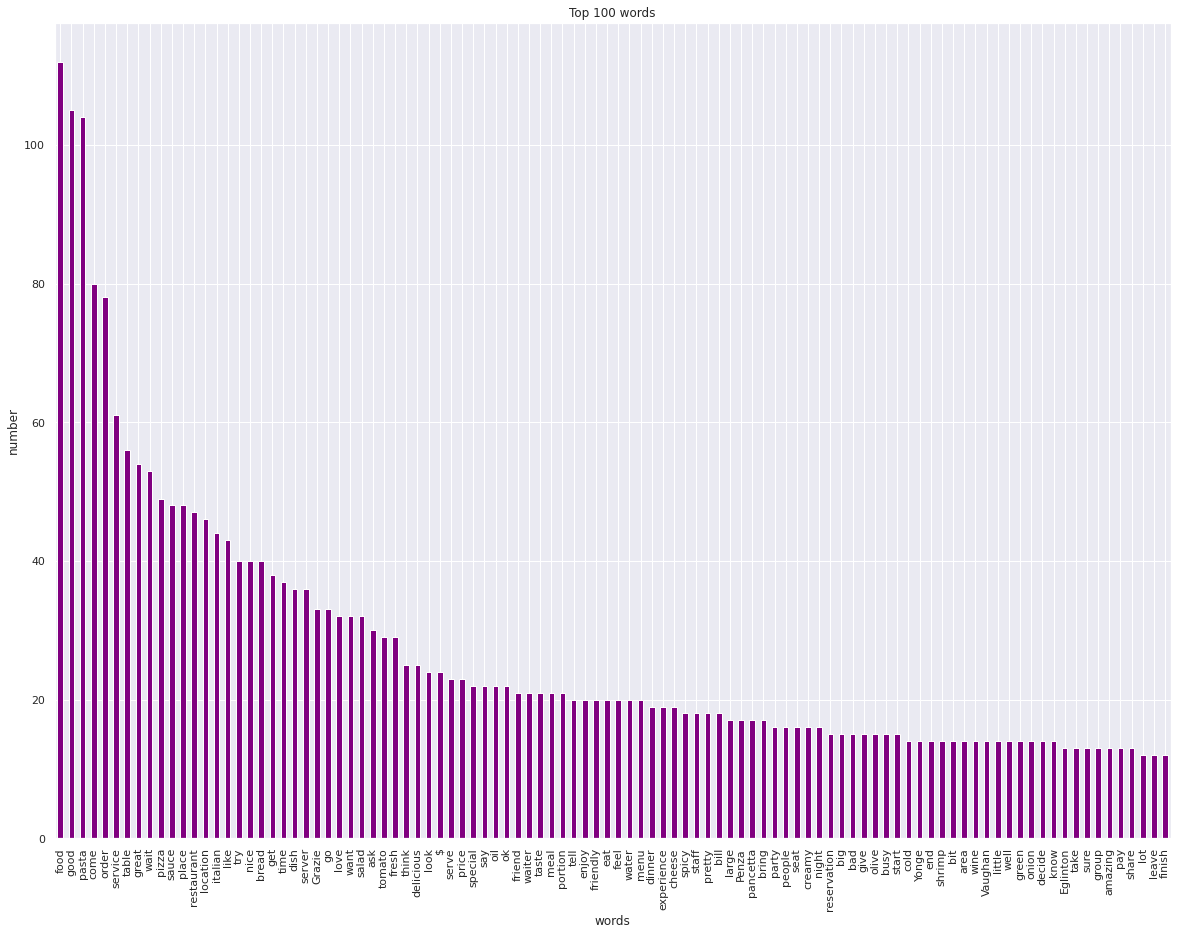

In [ ]:
# Create plot
b1_unstemmed_df.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(b1_unstemmed_df["words"]))
plt.xticks(y_pos, b1_unstemmed_df["words"])
plt.title('Top 100 words')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

We then take the words above and pass them through the stemmer and replot the graph.

In [ ]:
stemmed = []
stemmer = nltk.stem.PorterStemmer()

# Choose the words from the previous bag of words
for word in words:
    # Find word stem
    stemmed.append(stemmer.stem(word))

# Find counts of stemmed words
b1_counter_stemmed = Counter(stemmed)

# Create DataFrame for easy plotting
b1_stemmed_df = pd.DataFrame.from_dict(b1_counter_stemmed.most_common(100))
b1_stemmed_df = b1_stemmed_df.rename(columns={0: "words", 1 : "count"})

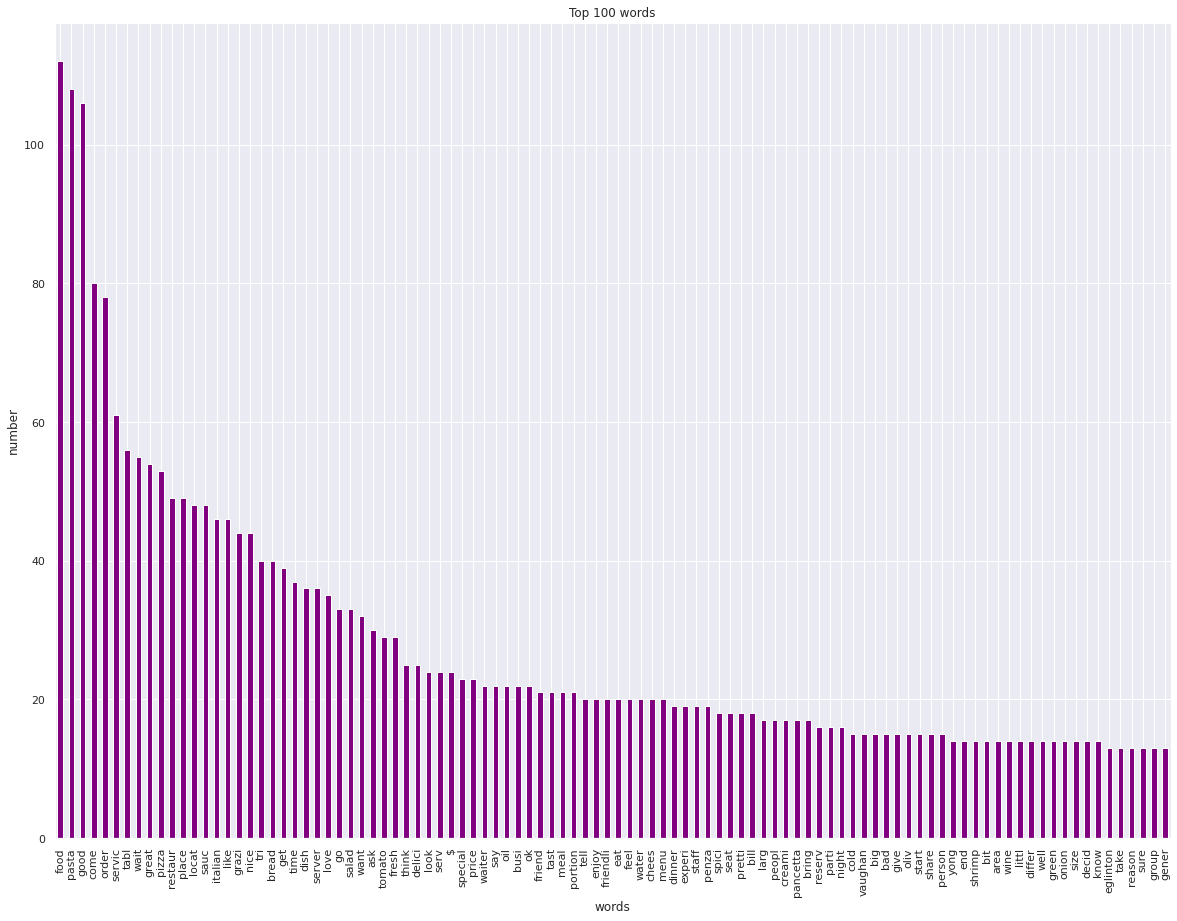

In [ ]:
# Create Plot
b1_stemmed_df.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(b1_stemmed_df["words"]))
plt.xticks(y_pos, b1_stemmed_df["words"])
plt.title('Top 100 words')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

##### B2
We then repeat the same process for B2

In [ ]:
words = []

# Randomly pick a business
b2 = selected_100.loc[selected_100['business_id'] == choice(selected_100.business_id)]
#added this to ensure that b1 != b2
while b2['business_id'].iloc[0] == b1['business_id'].iloc[0]:
  b2 = selected_100.loc[selected_100['business_id'] == choice(selected_100.business_id)]

# Create a bag of words
for doc in b2.nlp:
    for token in doc:
        if token.is_stop != True and token.is_punct != True and token.is_digit != True and token.is_space != True:
            words.append(token.lemma_)

# Find word counts from bag of words
b2_counter_unstemmed = Counter(words)

# Create DataFrame for easy plotting
b2_unstemmed_df = pd.DataFrame.from_dict(b2_counter_unstemmed.most_common(100))
b2_unstemmed_df = b2_unstemmed_df.rename(columns={0: "words", 1 : "count"})

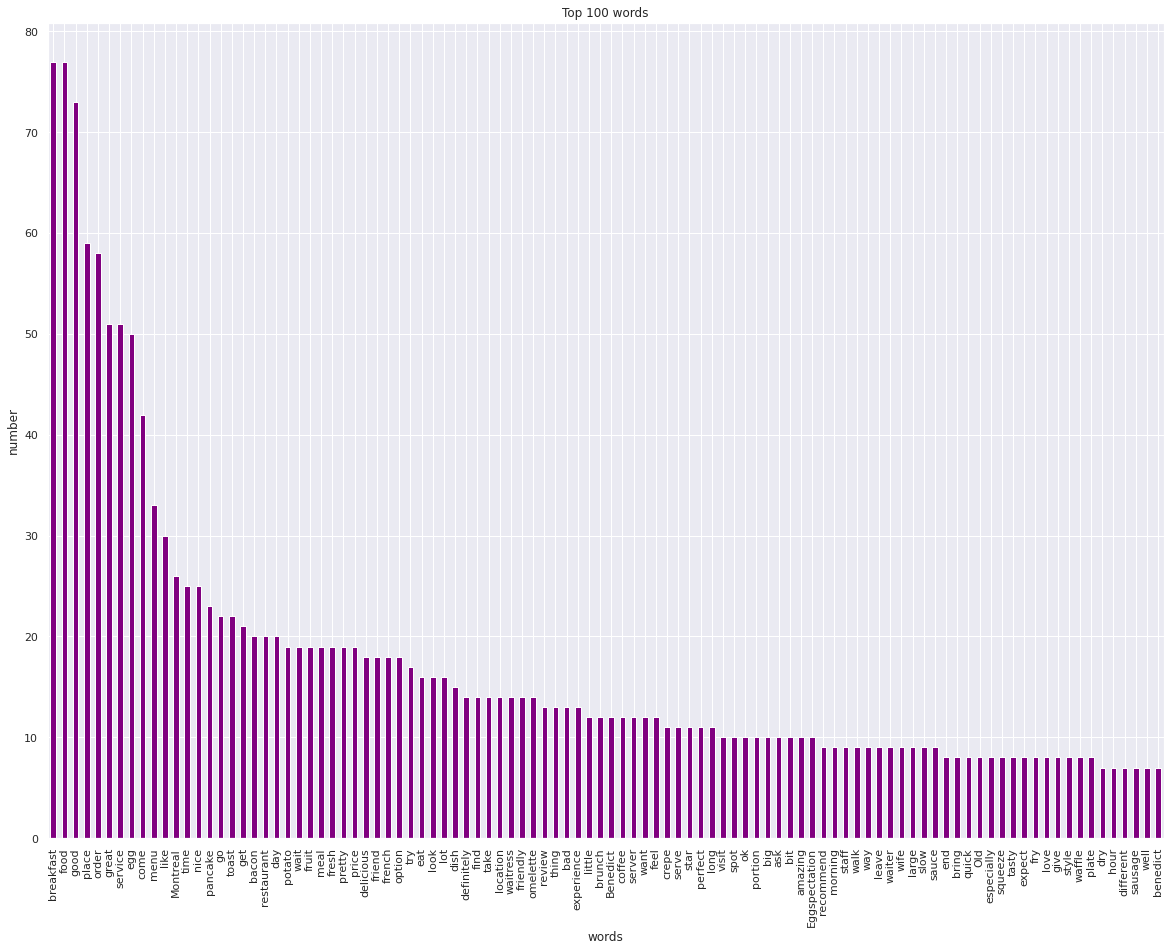

In [ ]:
b2_unstemmed_df.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(b2_unstemmed_df["words"]))
plt.xticks(y_pos, b2_unstemmed_df["words"])
plt.title('Top 100 words')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
stemmed = []

# Choose the words from the previous bag of words
for word in words:
    # Find word stem
    stemmed.append(stemmer.stem(word))

# Find counts of stemmed words
b2_counter_stemmed = Counter(stemmed)

# Create DataFrame for easy plotting
b2_stemmed_df = pd.DataFrame.from_dict(b2_counter_stemmed.most_common(100))
b2_stemmed_df = b2_stemmed_df.rename(columns={0: "words", 1 : "count"})

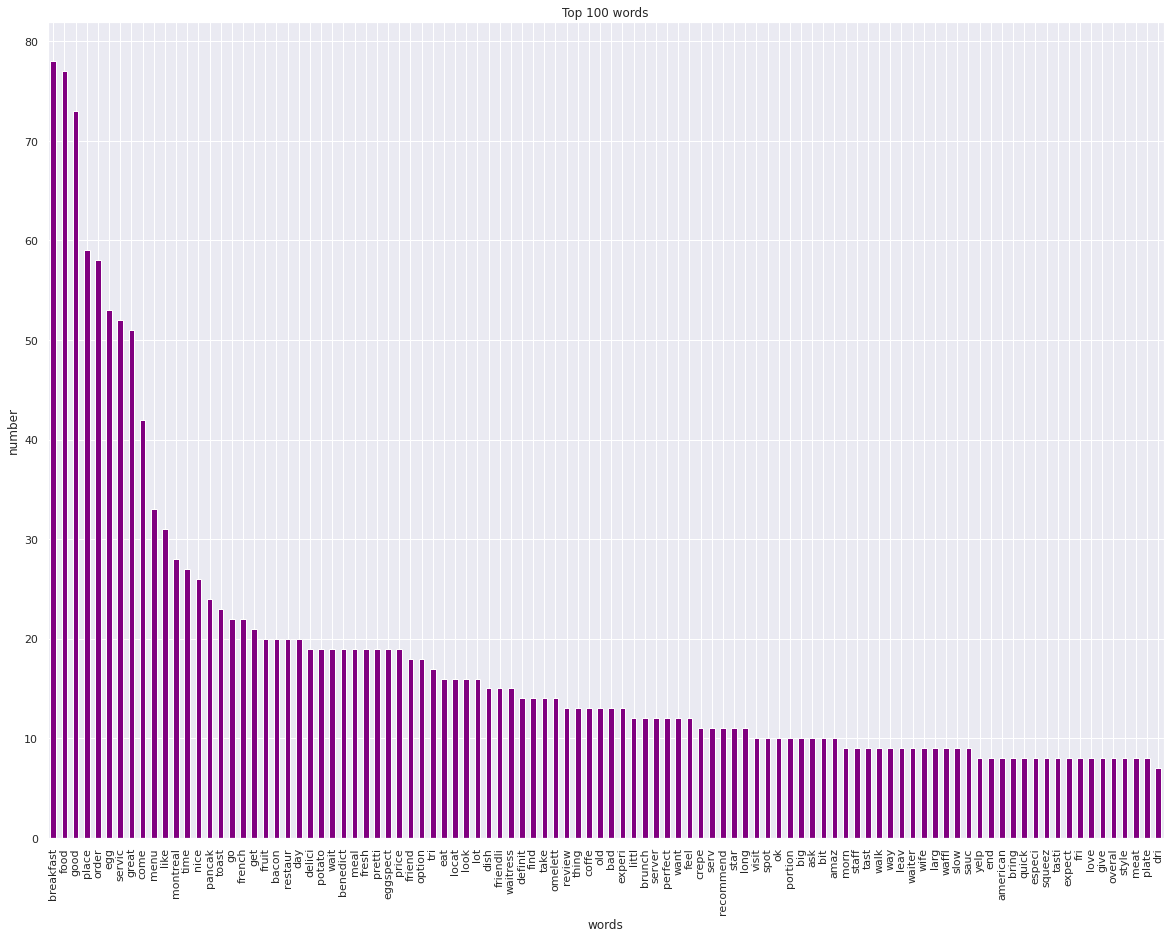

In [ ]:
b2_stemmed_df.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(b2_stemmed_df["words"]))
plt.xticks(y_pos, b2_stemmed_df["words"])
plt.title('Top 100 words')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

##### Printing Top-10 frequent words

In [ ]:
print(list(b1_unstemmed_df['words'].loc[:10]))
print(list(b1_stemmed_df['words'].loc[:10]))
print(list(b2_unstemmed_df['words'].loc[:10]))
print(list(b2_stemmed_df['words'].loc[:10]))

['food', 'good', 'pasta', 'come', 'order', 'service', 'table', 'great', 'wait', 'pizza', 'sauce']
['food', 'pasta', 'good', 'come', 'order', 'servic', 'tabl', 'wait', 'great', 'pizza', 'restaur']
['breakfast', 'food', 'good', 'place', 'order', 'great', 'service', 'egg', 'come', 'menu', 'like']
['breakfast', 'food', 'good', 'place', 'order', 'egg', 'servic', 'great', 'come', 'menu', 'like']


In [ ]:
# Memory management
del(stemmed, words)

#### Result
As seen from above, both businesses have different words that are the most frequent. The corresponding frequencies do follow Zipf's Law but the individual counts are not the same. When the words are stemmed, the counts decrease drastically and are more evened out as a lot of the words might have the same root but are used in different forms. 

### POS Tagging

#### Selecting the Data
First we have to select the 5 random reviews from the data using the `sample()` method

In [ ]:
random_sentences = selected_100.sample(5).reset_index(drop=True)
random_sentences.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,nlp,sentiment,lengths
0,T_oWuNmHEEQl0cuHl4R5mA,pXytzy-9WDY7RDtvpXuacQ,2ALnrUa1_U8JHNgscad8OQ,3,0,0,0,Cool place but there was one snobby blonde bar...,2009-08-09 07:10:02,"(Cool, place, but, there, was, one, snobby, bl...",-0.046429,97
1,Ew_uccNQIvUgtDU72DfEJw,YJYFsF4z-C2qODH5HnGXiw,wPgp3oddFUzpGrQc__HYhg,2,0,0,0,"Well, it was someones birthday. So I ended up ...",2012-11-29 05:36:08,"(Well, ,, it, was, someones, birthday, ., So, ...",0.189872,164
2,js317hNKA86DwPN3dLjlow,Ri2n8d3dMpep2FCvHGyGvg,7e3PZzUpG5FYOTGt3O3ePA,5,3,0,1,not only was the food amazing but the service ...,2015-10-14 20:17:39,"(not, only, was, the, food, amazing, but, the,...",0.296111,55
3,UKaQ5BK5GcxsGTsJRLqJxg,kB9QPxar7HLKIpK7qeMnFA,oICXzFAaUMrYGzjRWmkw4Q,3,2,0,1,"Came here again yesterday, ordered a Chicken B...",2013-08-07 06:16:52,"(Came, here, again, yesterday, ,, ordered, a, ...",-0.415667,30
4,RtfyiIy_fKCjL9shCA6l5w,U3s6Y7eDa5VH1_rW5AJC8g,a4GRh1TlOVhPD401mSPLZg,5,1,0,0,What a great experience! Today was surgery day...,2014-07-25 00:27:46,"(What, a, great, experience, !, Today, was, su...",0.363333,109


#### Tagging
Next we take the sentences and use spaCy's tagging feature to tag the sentences. spaCy has 2 tagging methods, one coarse and one fine, which result in 2 different but complementary tags for the same token.

In [ ]:
from IPython.core.display import display, HTML

In [ ]:
for text in random_sentences.nlp:
    sentence = next(text.sents)
    table = '<table> <tr> <th>Word</th> <th>Coarse</th> <th>Fine</th> </tr>'
    for token in sentence:
        table += f'<tr> <td>{token.lemma_}</td> <td>{token.pos_}</td> <td>{token.tag_}</td> </tr>'
    table += '</table> </br></br>'
    display(HTML(table))

Word,Coarse,Fine
cool,ADJ,JJ
place,NOUN,NN


Word,Coarse,Fine
well,INTJ,UH
",",PUNCT,","
-PRON-,PRON,PRP
be,AUX,VBD
someones,NOUN,NN
birthday,NOUN,NN
.,PUNCT,.


Word,Coarse,Fine
not,PART,RB
only,ADV,RB
be,AUX,VBD
the,DET,DT
food,NOUN,NN
amazing,ADJ,JJ
but,CCONJ,CC
the,DET,DT
service,NOUN,NN
as,ADV,RB


Word,Coarse,Fine
come,VERB,VBD
here,ADV,RB
again,ADV,RB
yesterday,NOUN,NN
",",PUNCT,","
order,VERB,VBD
a,DET,DT
Chicken,PROPN,NNP
Breast,PROPN,NNP
Pho,PROPN,NNP


Word,Coarse,Fine
what,DET,WDT
a,DET,DT
great,ADJ,JJ
experience,NOUN,NN
!,PUNCT,.


#### Result
As seen above, the tags tend to complement one another and the fine grained tags give more details about the nature of the word. For example, it can differentiate between Singular Nouns (NN) and Plural Nouns (NNS) while the coarse tagging cannot 

### Writing Style

Using a random generator, we arrived at the date of 7 Feb 2021. We then searched for posts/articles from that date on the 3 websites and took the top 2 results from each platform.

https://www.channelnewsasia.com/singapore/covid-19-new-cases-feb-7-community-airport-issue-shn-device-335726
https://www.channelnewsasia.com/singapore/wuhan-coronavirus-moh-new-cases-feb-7-775716

https://forums.hardwarezone.com.sg/threads/spore-24-cases-1-in-community-23-imported-07feb2021.6461534/
https://forums.hardwarezone.com.sg/threads/value-dollar-store-made-me-realised-how-overcharged-other-shops-are-part-2.6355899/page-210

https://stackoverflow.com/questions/66088443/install-angular-unsupported-engine-osx/66088694#66088694
https://stackoverflow.com/questions/66090210/swiftui-datepicker-jumps-between-short-and-medium-date-formats-when-changing-the

In [ ]:
#scrape stackoverflow1
url1 = 'https://stackoverflow.com/questions/66088443/install-angular-unsupported-engine-osx/66088694#66088694'
page1 = requests.get(url1).text
soup1 = BeautifulSoup(page1)
p_tags1 = soup1.find_all('p')
p_tags_text1 = [tag.get_text().strip() for tag in p_tags1]
p_tags2 = soup1.find_all('pre')
p_tags_text2 = [tag.find('code').get_text().strip() for tag in p_tags2]
p_tags_text3= p_tags_text1+p_tags_text2
SOF1 = [' '.join(item.split()) for item in p_tags_text3]
SOF11 = ' '.join(SOF1)

#scrape stackoverflow2
url2 = 'https://stackoverflow.com/questions/66090210/swiftui-datepicker-jumps-between-short-and-medium-date-formats-when-changing-the'
page1 = requests.get(url2).text
soup1 = BeautifulSoup(page1)
p_tags1 = soup1.find_all('p')
p_tags_text1 = [tag.get_text().strip() for tag in p_tags1]
p_tags2 = soup1.find_all('pre')
p_tags_text2 = [tag.find('code').get_text().strip() for tag in p_tags2]
p_tags_text3= p_tags_text1+p_tags_text2
SOF2 = [' '.join(item.split()) for item in p_tags_text3]
SOF22 = ' '.join(SOF2)

In [ ]:
#scrape hardwarezone1
url3 = 'https://forums.hardwarezone.com.sg/threads/spore-24-cases-1-in-community-23-imported-07feb2021.6461534/'
page3 = requests.get(url3).text
soup3 = BeautifulSoup(page3)
p_tags3 = soup3.find_all('div', class_= 'bbWrapper')
p_tags_text3 = [tag.get_text().strip() for tag in p_tags3]

HWZ1 = [' '.join(item.split()) for item in p_tags_text3]
HWZ11 = ' '.join(HWZ1)

#scrape hardwarezone2
url4 = 'https://forums.hardwarezone.com.sg/threads/value-dollar-store-made-me-realised-how-overcharged-other-shops-are-part-2.6355899/page-210'
page4 = requests.get(url4).text
soup4 = BeautifulSoup(page4)
p_tags4 = soup4.find_all('div', class_= 'bbWrapper')
p_tags_text4 = [tag.get_text().strip() for tag in p_tags4]

HWZ2 = [' '.join(item.split()) for item in p_tags_text4]
HWZ22 = ' '.join(HWZ2)

In [ ]:
#scrape channelnewsasia1
from bs4 import BeautifulSoup as BS
url5 = 'https://www.channelnewsasia.com/singapore/covid-19-new-cases-feb-7-community-airport-issue-shn-device-335726'
agent = {"User-Agent":'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'}
page5 = requests.get(url5, headers=agent)

soup5 = BeautifulSoup(page5.content)
p_tags5 = soup5.find_all('p')
p_tags_text5 = [tag.get_text().strip() for tag in p_tags5]

CNA1 = [' '.join(item.split()) for item in p_tags_text5]
CNA11 = ' '.join(CNA1)

#scrape channelnewsasia1
url6 = 'https://www.channelnewsasia.com/singapore/wuhan-coronavirus-moh-new-cases-feb-7-775716'
agent = {"User-Agent":'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'}
page6 = requests.get(url6, headers=agent)
soup6 = BeautifulSoup(page6.content)
p_tags6 = soup6.find_all('p')
p_tags_text6 = [tag.get_text().strip() for tag in p_tags6]

CNA2 = [' '.join(item.split()) for item in p_tags_text6]
CNA22 = ' '.join(CNA2)

#### Stylometry
Features involved:
- Average sentence length
- Remove special characters
- Count of functional words
- Count of punctuation 
- Check for capitalisation of Proper Nouns and starting word of sentences
- Simpsons Index


In [ ]:
#average sentence length by words
def Avg_SentLengthByWord(text):
    doc = nlp(text)
    return np.average([len(sents) for sents in doc.sents]) 

def RemoveSpecialCHs(text):
    doc=nlp(text)
    st = [",", ".", "'", "!", '"', "#", "$", "%", "&", "(", ")", "*", "+", "-", ".", "/", ":", ";", "<", "=", '>', "?",
          "@", "[", "\\", "]", "^", "_", '`', "{", "|", "}", '~', '\t', '\n']
    words = [word.text for word in doc if word.text not in st]
    return words

#functional word count
def CountFunctionalWords(text):
    functional_words = """a between in nor some upon
    about both including nothing somebody us
    above but inside of someone used
    after by into off something via
    all can is on such we
    although cos it once than what
    am do its one that whatever
    among down latter onto the when
    an each less opposite their where
    and either like or them whether
    another enough little our these which
    any every lots outside they while
    anybody everybody many over this who
    anyone everyone me own those whoever
    anything everything more past though whom
    are few most per through whose
    around following much plenty till will
    as for must plus to with
    at from my regarding toward within
    be have near same towards without
    because he need several under worth
    before her neither she unless would
    behind him no should unlike yes
    below i nobody since until you
    beside if none so up your
    """
    functional_words = functional_words.split()
    words = RemoveSpecialCHs(text)
    count = 0
    for i in text:
        if i in functional_words:
            count += 1
    return count / len(words) * 100

#capitalization of first word of each sentence
def CountPunctuation(text):
    st = [",", ".", "'", "!", '"', ";", "?", ":", ";"]
    count = 0
    c_sent = 0
    c_upper = 0
    counter = 0
    for i in text:
        if (i in st):
          count = count + 1
          if i == "." and counter+2 < len(text) and text[counter+1] == " ": #define the start of a sentence after every ". "
            c_sent = c_sent + 1 
            if text[counter+2][0].isupper():
              c_upper = c_upper + 1
        counter = counter + 1
    return [float(count) / float(len(text)) * 100, (c_upper / c_sent)*100]

#readability, vocabulary richness
# 1 - (sigma(n(n - 1))/N(N-1)
# N is total number of words
# n is the number of each type of word
def SimpsonsIndex(text):
    words = RemoveSpecialCHs(text)
    freqs = Counter()
    freqs.update(words)
    N = len(words)
    n = sum([1.0 * i * (i - 1) for i in freqs.values()])
    D = 1 - (n / (N * (N - 1)))
    return D

#capitalization of Proper Nouns
def propn_pct(text):
    doc = nlp(text)
    pos = [tok.i for tok in doc if tok.pos_ == "PROPN"]
    c_cap = 0
    consecutives = []
    current = []
    for elt in pos:
        if len(current) == 0:
            current.append(elt)
        else:
            if current[-1] == elt - 1:
                current.append(elt)
            else:
                consecutives.append(current)
                current = [elt]
    if len(current) != 0:
        consecutives.append(current)
    propn = [doc[consecutive[0]:consecutive[-1]+1] for consecutive in consecutives]
    for i in propn:
      for j in i:
        if j.text[0].islower():
          c_cap = c_cap - 1
          break
      c_cap = c_cap + 1
    return (c_cap/len(propn))*100

##### POS tagging for StackOverflow


In [ ]:
tags={}
for i in [SOF11,SOF22]:
  doc = nlp(i)
  for token in doc:
    if token.pos_ not in tags:
      tags[token.pos_]=[]
    if token.text not in tags[token.pos_]:
      tags[token.pos_].append(token.text)
df_tags=pd.DataFrame.from_dict(tags, orient='index')
df_tags[:-1].T.head(20)

,VERB,ADJ,PUNCT,NOUN,CCONJ,ADP,DET,PRON,PROPN,AUX,PART,ADV,X,SYM,NUM,SCONJ,INTJ
0,Find,centralized,",",content,and,around,the,you,Q&A,is,to,when,npm,/,7.5.6,as,Please
1,trusted,most,.,technologies,And,for,a,I,Connect,am,not,why,>,=,9.1.15,As,None
2,collaborate,single,(,Teams,but,within,that,i,MacBook,was,n't,now,^0.1102.5,$,10.2.3,because,None
3,use,structured,),work,or,along,my,it,@angular,have,To,fully,etc,None,11.2.2,like,None
4,share,easy,?,knowledge,But,with,Any,something,npm,do,None,also,.date,None,12.0.0-next.2,If,None
5,search,following,...,location,either,per,each,--global,GitHub,had,None,generally,<,None,7,that,None
6,reinstalling,-g,-,message,None,from,this,It,Windows,'s,None,very,None,None,7.5.2,None,None
7,receive,angular,:,cli,None,of,This,what,v15.4.0,Do,None,recently,None,None,2021,None,None
8,install,greater,{,idea,None,by,an,None,CLI,has,None,newer,None,None,10.13.0,None,None
9,suspect,major,',nom,None,on,all,None,ng,been,None,Now,None,None,1.13.0,None,None


#####Results

In [ ]:
from collections import defaultdict
textlist = [SOF11, SOF22, HWZ11, HWZ22, CNA11, CNA22]
namelist = ["StackOverflow1", "StackOverflow2", "HardwareZone1", "HardwareZone2", "ChannelNewsAsia1", "ChannelNewsAsia2"]
counter = 0
tab = defaultdict(dict)
for i in textlist:
  tab[namelist[counter]]["sent_length"]=Avg_SentLengthByWord(i)
  tab[namelist[counter]]["pct_func_word"]=CountFunctionalWords(i)
  tab[namelist[counter]]["pct_punctuation"]=CountPunctuation(i)[0]
  tab[namelist[counter]]["pct_1st_capt"]=CountPunctuation(i)[1]
  tab[namelist[counter]]["vocab_rich_score"]=SimpsonsIndex(i)
  tab[namelist[counter]]["pct_PPN_capt"]=propn_pct(i)
  counter = counter + 1

pd.DataFrame(tab)

,StackOverflow1,StackOverflow2,HardwareZone1,HardwareZone2,ChannelNewsAsia1,ChannelNewsAsia2
sent_length,19.700000,16.580645,9.283019,10.308642,18.222222,19.655738
pct_func_word,51.201201,70.175439,68.750000,59.043348,76.256158,74.603175
pct_punctuation,7.530454,3.480000,3.143093,5.637513,2.065849,1.836044
pct_1st_capt,64.705882,75.000000,59.090909,56.818182,89.473684,94.339623
vocab_rich_score,0.982474,0.993640,0.993791,0.994101,0.993140,0.993145
pct_PPN_capt,46.788991,72.413793,51.162791,39.024390,100.000000,99.056604


### Most Frequent Noun-Adjective Pairs

#### Extracting noun-adjective pairs
First we have to find all the noun-adjective pairs by looking at the dependency trees. We do this by finding all ADJ with a NOUN parent.

##### Rating 1

In [ ]:
# Select reviews with 1 star rating
one_star = selected_100.loc[selected_100['stars'] == 1]
# Sample 50 businesses from reviews with 1 star rating
businesses = sample(set(one_star.business_id),50)

# Extract 1 review from each sampled business
reviews = []
for biz in businesses:
    reviews.append(one_star.loc[one_star['business_id'] == biz].sample(1).iloc[0].nlp)

In [ ]:
# extracting noun-adjective pairs
pairs = [] #stored as an array of "noun-adjective" strings

for doc in reviews:
    for token in doc:
        if token.pos_ == "ADJ" and token.head.pos_ == "NOUN":
            pair = token.text.lower() + "-" + token.head.text.lower() #e.g. "delicious-food"
            pairs.append(pair)

In [ ]:
# Find counts of stemmed words
pairs1_counter = Counter(pairs)

# Create DataFrame for easy plotting
pairs1_df = pd.DataFrame.from_dict(pairs1_counter.most_common(100))
pairs1_df = pairs1_df.rename(columns={0: "noun-adjective", 1 : "count"})

##### Rating 2-5

In [ ]:
pairs_dfs = [pairs1_df]

for rating in range(2,6):
    star = selected_100.loc[selected_100['stars'] == rating]
    businesses = sample(set(star.business_id),20)

    reviews = []
    for biz in businesses:
        reviews.append(star.loc[star['business_id'] == biz].sample(1).iloc[0].nlp)

    pairs = [] #stored as an array of "noun-adjective" strings

    for doc in reviews:
        for token in doc:
            if token.pos_ == "ADJ" and token.head.pos_ == "NOUN":
                pair = token.text.lower() + "-" + token.head.text.lower() #e.g. "delicious-food"
                pairs.append(pair)
    
    # Find counts of stemmed words
    pairs_counter = Counter(pairs)

    # Create DataFrame for easy plotting
    pairs_df = pd.DataFrame.from_dict(pairs_counter.most_common(100))
    pairs_df = pairs_df.rename(columns={0: "noun-adjective", 1 : "count"})
    pairs_dfs.append(pairs_df)

#### Additional - Noun-adjective Distributions

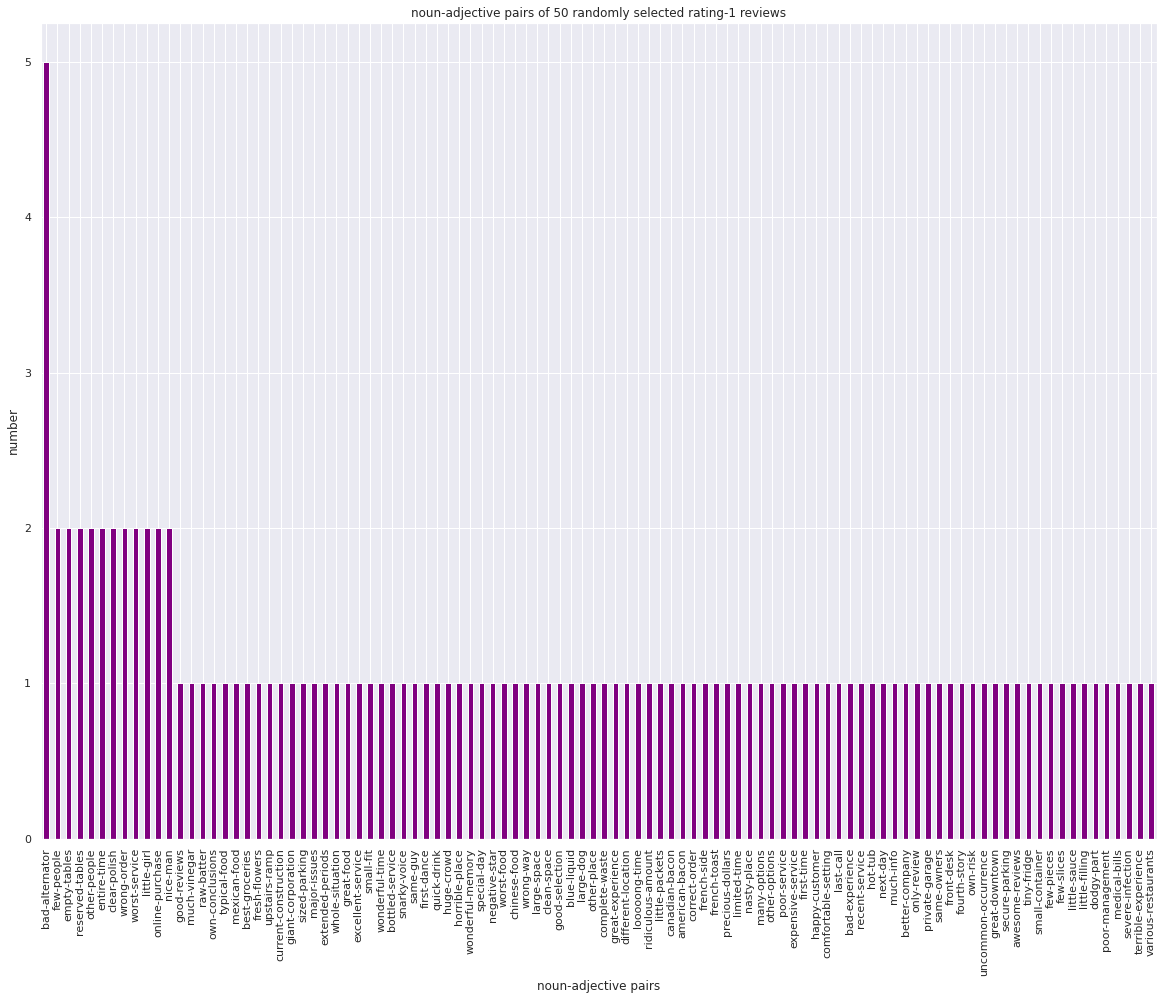

In [ ]:
pairs_dfs[0].plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(pairs1_df["noun-adjective"]))
plt.xticks(y_pos, pairs1_df["noun-adjective"])
plt.title('noun-adjective pairs of 50 randomly selected rating-1 reviews')
plt.xlabel('noun-adjective pairs')
plt.ylabel('number')
plt.show()

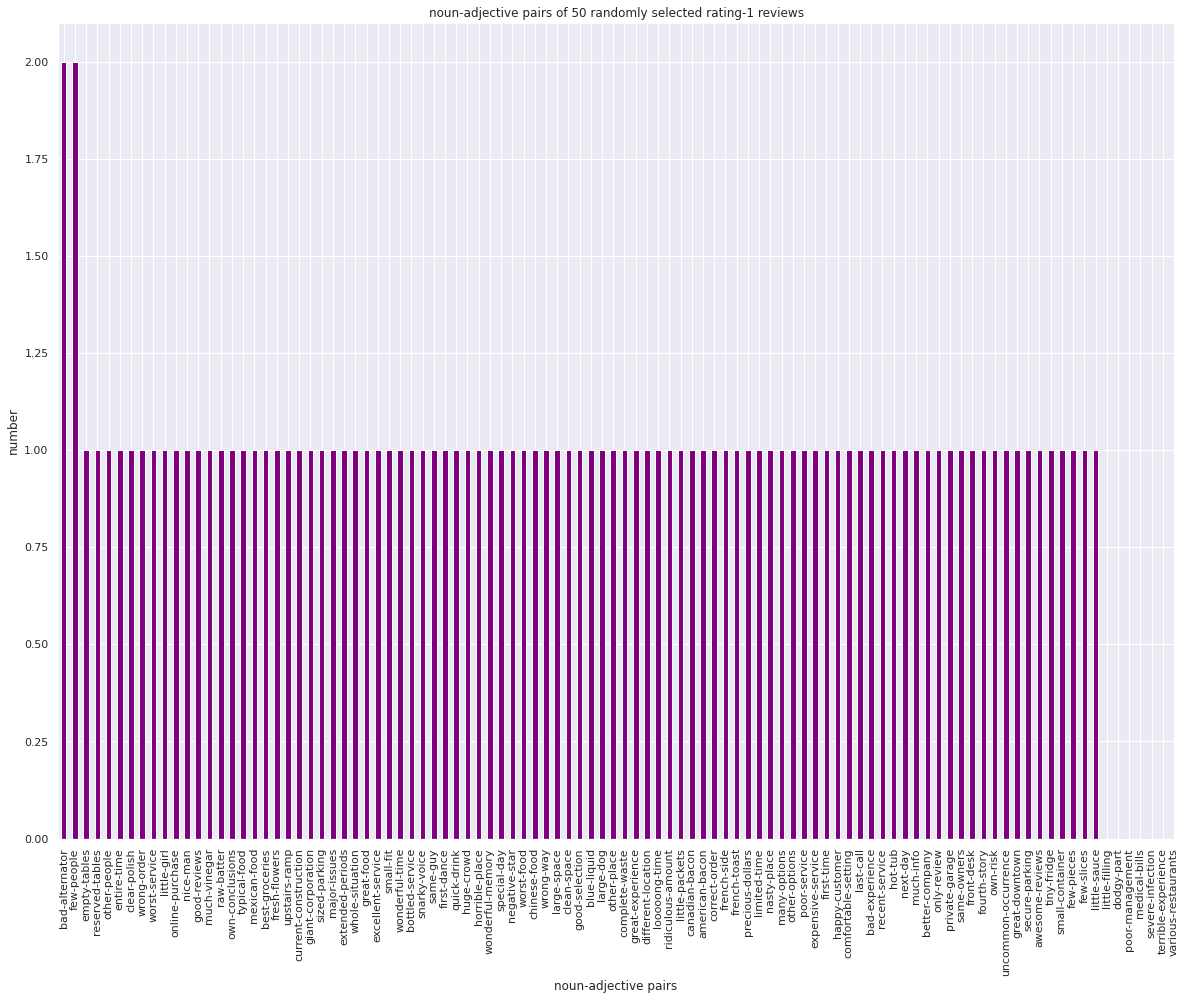

In [ ]:
pairs_dfs[1].plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(pairs1_df["noun-adjective"]))
plt.xticks(y_pos, pairs1_df["noun-adjective"])
plt.title('noun-adjective pairs of 50 randomly selected rating-1 reviews')
plt.xlabel('noun-adjective pairs')
plt.ylabel('number')
plt.show()

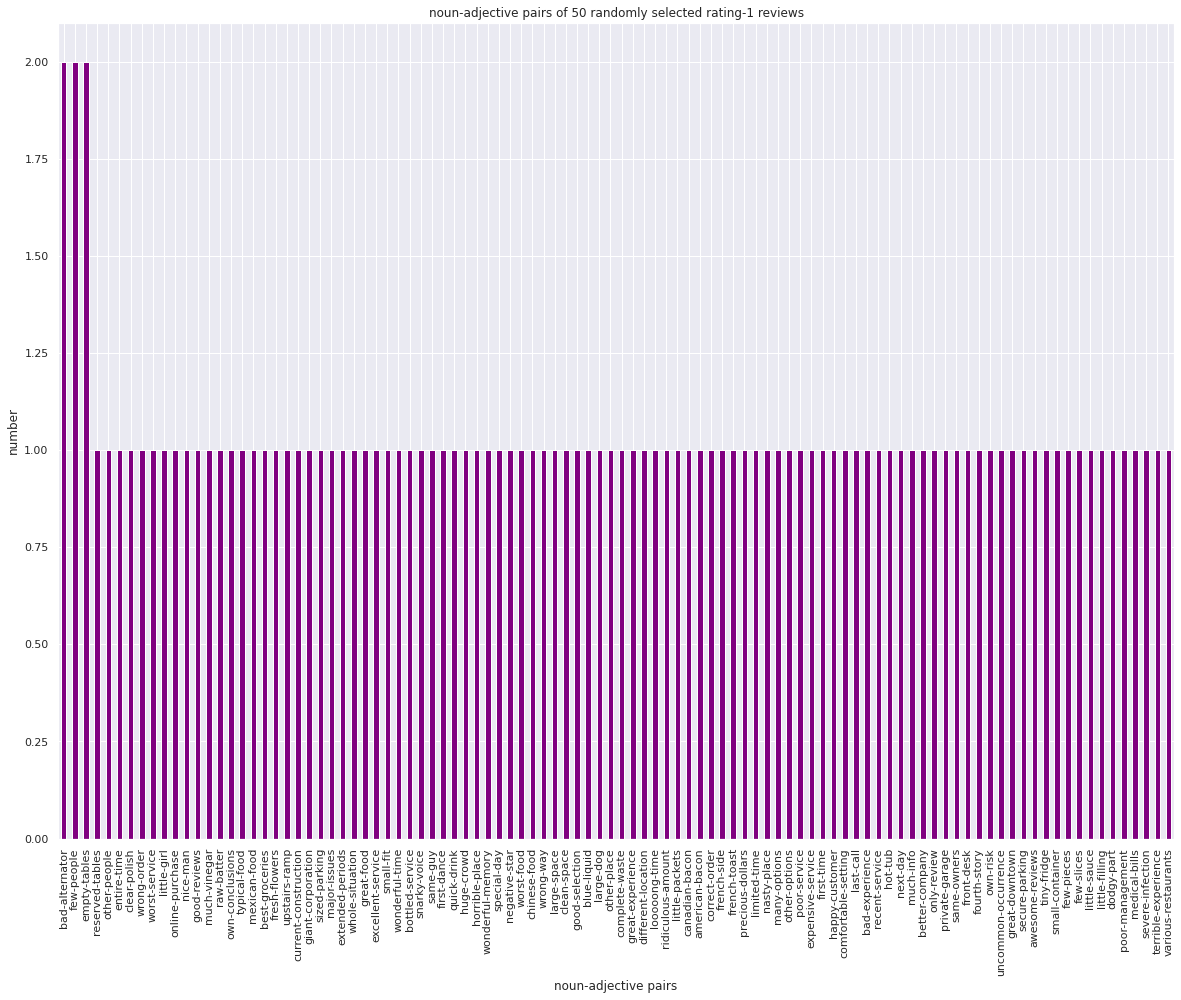

In [ ]:
pairs_dfs[2].plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(pairs1_df["noun-adjective"]))
plt.xticks(y_pos, pairs1_df["noun-adjective"])
plt.title('noun-adjective pairs of 50 randomly selected rating-1 reviews')
plt.xlabel('noun-adjective pairs')
plt.ylabel('number')
plt.show()

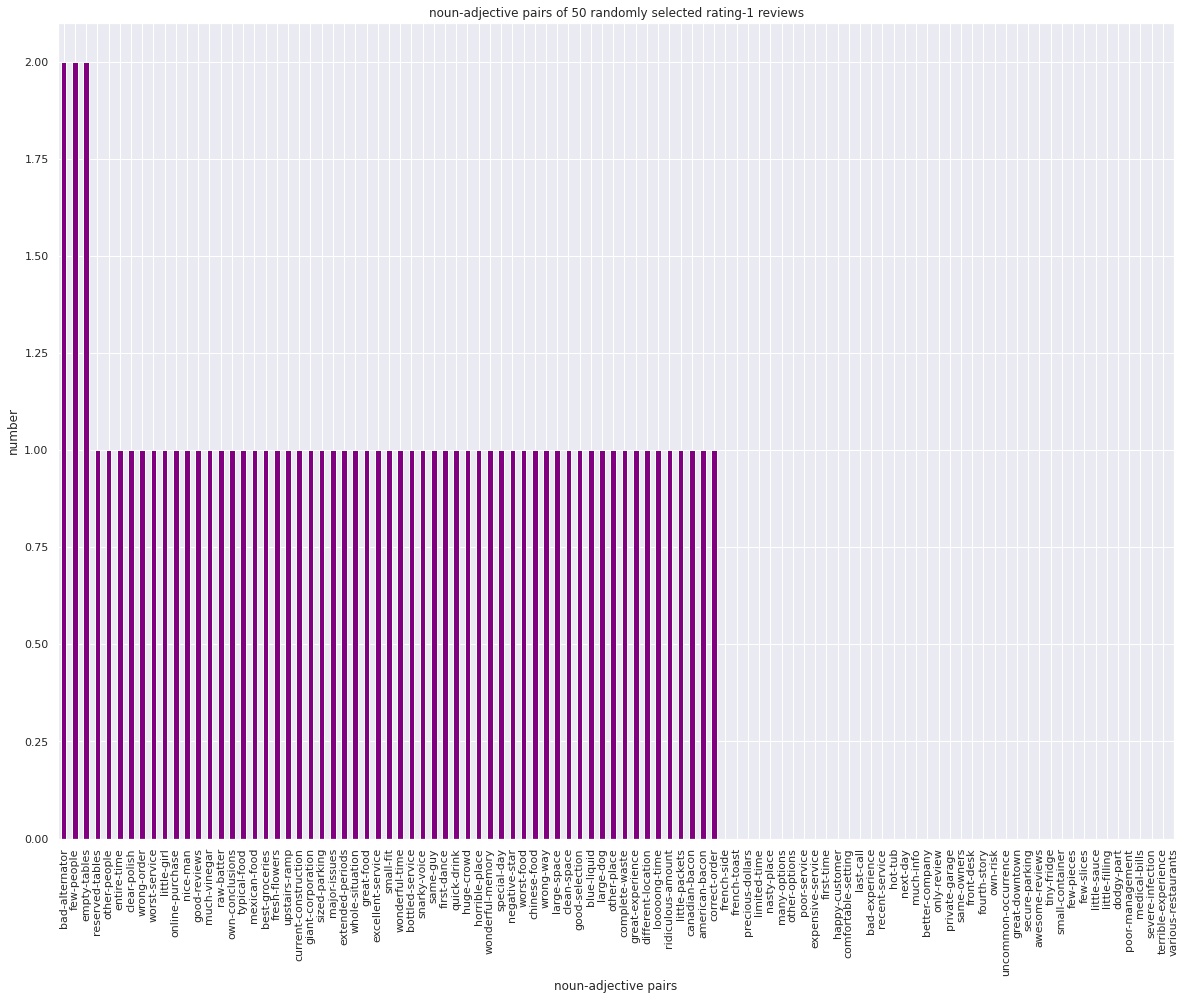

In [ ]:
pairs_dfs[3].plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(pairs1_df["noun-adjective"]))
plt.xticks(y_pos, pairs1_df["noun-adjective"])
plt.title('noun-adjective pairs of 50 randomly selected rating-1 reviews')
plt.xlabel('noun-adjective pairs')
plt.ylabel('number')
plt.show()

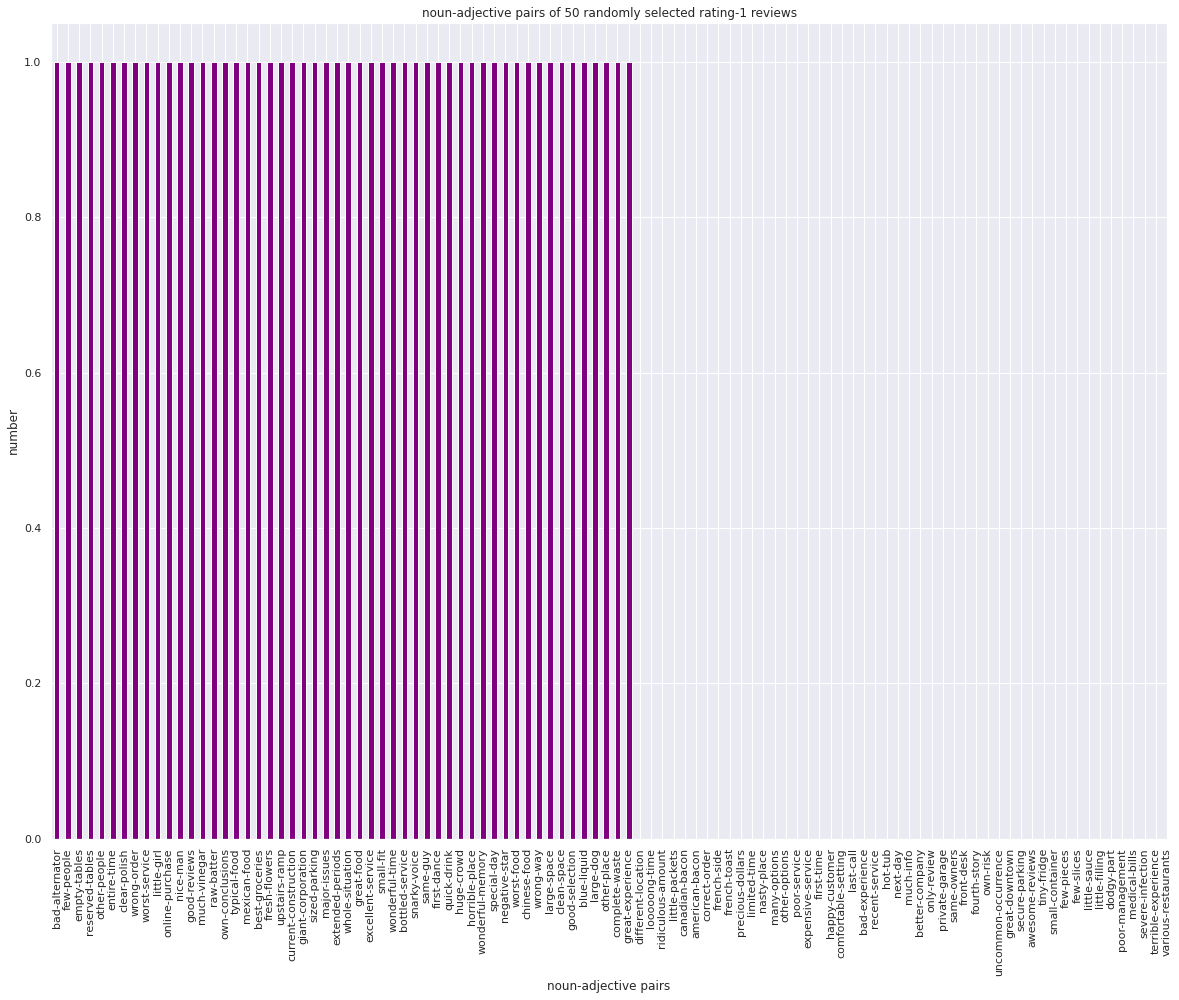

In [ ]:
pairs_dfs[4].plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(pairs1_df["noun-adjective"]))
plt.xticks(y_pos, pairs1_df["noun-adjective"])
plt.title('noun-adjective pairs of 50 randomly selected rating-1 reviews')
plt.xlabel('noun-adjective pairs')
plt.ylabel('number')
plt.show()

#### Top-10 most Frequent

In [ ]:
for i in range(5):
    print(i + 1, " stars:\t", list(pairs_dfs[i]['noun-adjective'].loc[:10]))

1  stars:	 ['bad-alternator', 'few-people', 'empty-tables', 'reserved-tables', 'other-people', 'entire-time', 'clear-polish', 'wrong-order', 'worst-service', 'little-girl', 'online-purchase']
2  stars:	 ['few-months', 'late-lunch', 'few-time', 'far-cry', 'past-exp', 'full-mail', 'prearranged-financing', 'particular-car', 'hard-feelings', 'todays-age', 'other-add']
3  stars:	 ['fast-food', 'first-week', 'own-salad', 'simple-cut', 'next-time', 'tasty-eat', 'local-stores', 'vegetarian-realm', 'hot-course', 'lucky-surprise', 'great-menu']
4  stars:	 ['good-place', 'vietnamese-coffee', 'happy-life', 'great-food', 'few-drinks', 'great-place', 'awesome-spot', 'happy-hour', 'good-times', 'many-basics', 'other-basics']
5  stars:	 ['warm-welcome', 'welcomed-spot', 'perfect-taste', 'initial-thought', 'rustic-barn', 'looking-barn', 'small-gesture', 'long-way', '8th-birthday', 'live-band', 'more-plates']


Below, we save the adjective part of the top 50 most frequent adjectives pairs for each rating. This will be used in the Application section later.

In [ ]:
top_adjectives_by_rating = []
for p_df in pairs_dfs:
    top_50 = []
    for pair in list(p_df['noun-adjective'].loc[:49]):
        adj = pair[:pair.find('-')]
        top_50.append(adj)
    top_adjectives_by_rating.append(Counter(top_50)) # a counter is used instead of a set, to give higher weights to multiple occurences

top_adjectives_by_rating[4]

Counter({'8th': 1,
         'asian': 1,
         'best': 4,
         'big': 1,
         'bright': 1,
         'double': 1,
         'favorite': 2,
         'free': 2,
         'full': 1,
         'great': 6,
         'hungry': 1,
         'initial': 2,
         'italian': 1,
         'live': 1,
         'long': 2,
         'looking': 1,
         'modern': 1,
         'more': 3,
         'most': 1,
         'multiple': 1,
         'new': 2,
         'nice': 2,
         'perfect': 1,
         'pho': 1,
         'pleasant': 1,
         'regular': 1,
         'rustic': 1,
         'second': 1,
         'small': 1,
         'super': 1,
         'true': 1,
         'warm': 1,
         'weird': 1,
         'welcomed': 1})

## Indicative Adjective Phrases

In [ ]:
# Randomly pick a business
b3 = selected_100.loc[selected_100['business_id'] == choice(selected_100.business_id)]

#added this to ensure that b3 != b2 or b1
while b3['business_id'].iloc[0] == b2['business_id'].iloc[0] or b3['business_id'].iloc[0] == b1['business_id'].iloc[0]:
    b3 = selected_100.loc[selected_100['business_id'] == choice(selected_100.business_id)]

Adjectives in b3 are identified using POS tagging. Then, dependency structures of the adjectives are explored to obtain their child words. 

In [ ]:
AP_b3 = []

for doc in b3.nlp:
    for num, token in enumerate(doc):
        if token.pos_ == "ADJ" and not token.is_stop and not token.is_punct and not token.is_digit and not token.is_space:
            phrases = []
            for t in token.children:
                # Child is stop word
                if t.is_stop or t.is_punct or t.is_digit or t.is_space:
                    continue
                # 1st child appears before Adjective
                elif t.text == doc[num-1].text:
                    phrases.append(t.text)
                    phrases.append(token.text)
                # 2nd child appears after Adjective 
                elif num+1<len(doc) and t.text == doc[num+1].text and len(phrases)!=0:
                    phrases.append(t.text)
                # 1st child appears after Adjective
                elif num+1<len(doc) and t.text == doc[num+1].text and len(phrases) == 0:
                    phrases.append(token.text)
                    phrases.append(t.text)
            # Adjective Phrase consists of only the Adjective
            if len(phrases)==0:
                phrases.append(token.text)
            string = " ".join(phrases)
            AP_b3.append(string.lower())

We want to do a comparison between the APs from b3 and those from a sample. Using stratified sampling, 50 reviews are taken from each of the other 152 businesses, so that we can obtain a sample that best represents the entire population.

In [ ]:
#for every business pick 50 reviews
sample = []
business_set = set(selected_100['business_id'].tolist())
business_set.remove(b3.business_id.iloc[0])

for business in business_set:
    reviews = selected_100.loc[selected_100["business_id"] == business]
    sample = sample + reviews.sample(50).nlp.tolist()

The APs are then extracted from the sampled reviews in a similar fashion to b3.

In [ ]:
AP_sample = []

for doc in sample:
    for num, token in enumerate(doc):
        if token.pos_ == "ADJ" and not token.is_stop and not token.is_punct and not token.is_digit and not token.is_space:
            phrases = []
            for t in token.children:
                # Child is stop word
                if t.is_stop or t.is_punct or t.is_digit or t.is_space:
                    continue
                # 1st child appears before Adjective
                elif t.text == doc[num-1].text:
                    phrases.append(t.text)
                    phrases.append(token.text)
                # 2nd child appears after Adjective 
                elif num+1<len(doc) and t.text == doc[num+1].text and len(phrases)!=0:
                    phrases.append(t.text)
                # 1st child appears after Adjective
                elif num+1<len(doc) and t.text == doc[num+1].text and len(phrases) == 0:
                    phrases.append(token.text)
                    phrases.append(t.text)
            # Adjective Phrase consists of only the Adjective
            if len(phrases)==0:
                phrases.append(token.text)
            string = " ".join(phrases)
            AP_sample.append(string.lower())

We use cross entropy to compare the probability distribution of APs in b3 and those in the population (b3 + sample).

In [ ]:
c_b3 = Counter(AP_b3)
prob_b3 = []
prob_b3_words = []
ls = c_b3.most_common()
for i in ls:
    prob_b3_words.append(i[0])
    prob_b3.append(i[1]/len(AP_b3))

In [ ]:
df_b3=pd.DataFrame(prob_b3)

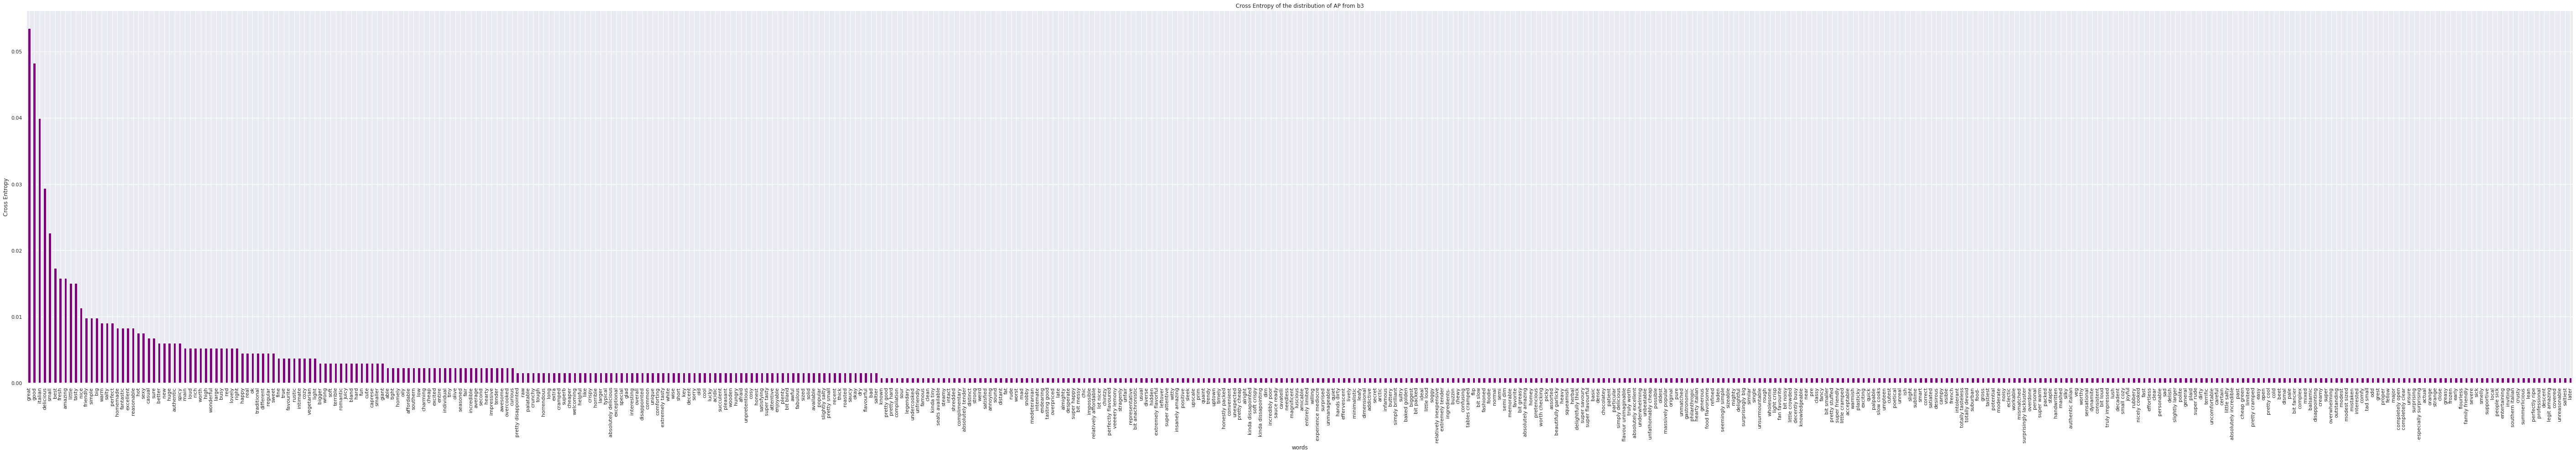

In [ ]:
df_b3.plot.bar(legend = False, color = 'purple', figsize = (100,15))
plt.xticks(np.arange(len(prob_b3_words)),prob_b3_words)
plt.title('Cross Entropy of the distribution of AP from b3')
plt.xlabel('words')
plt.ylabel('Cross Entropy')
plt.show()

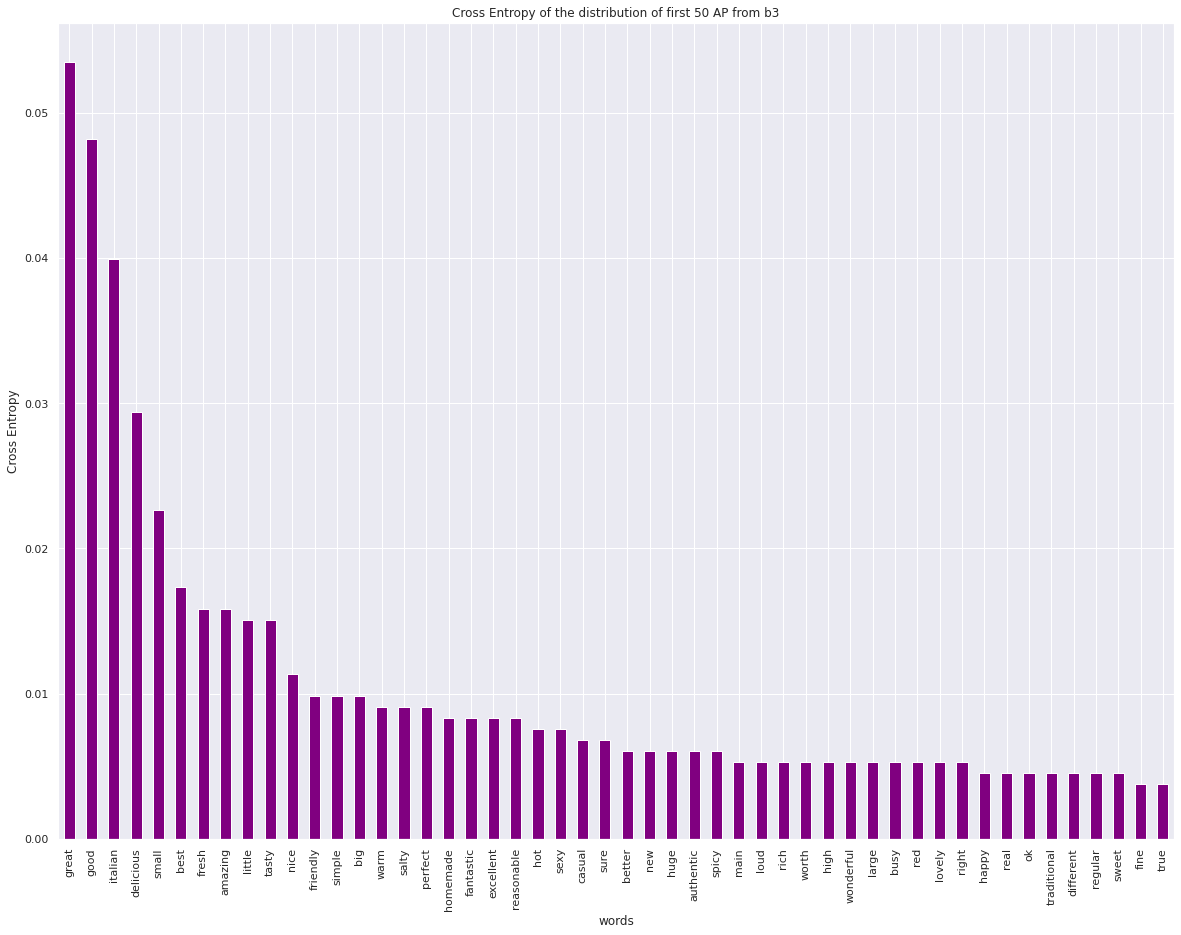

In [ ]:
# Zoomed in diagram for Report and Clarity
df_b3_50=pd.DataFrame(prob_b3[:50])
df_b3_50.plot.bar(legend = False, color = 'purple', figsize = (20,15))
plt.xticks(np.arange(50),prob_b3_words[:50])
plt.title('Cross Entropy of the distribution of first 50 AP from b3')
plt.xlabel('words')
plt.ylabel('Cross Entropy')
plt.show()

In [ ]:
pop = AP_b3+AP_sample
c_pop = Counter(pop)
prob_pop = []
prob_pop_words = []
ls = c_b3.most_common()
for i in ls:
  prob_pop_words.append(i[0])
  prob_pop.append(i[1]/len(pop))

In [ ]:
df_pop=pd.DataFrame(prob_pop)

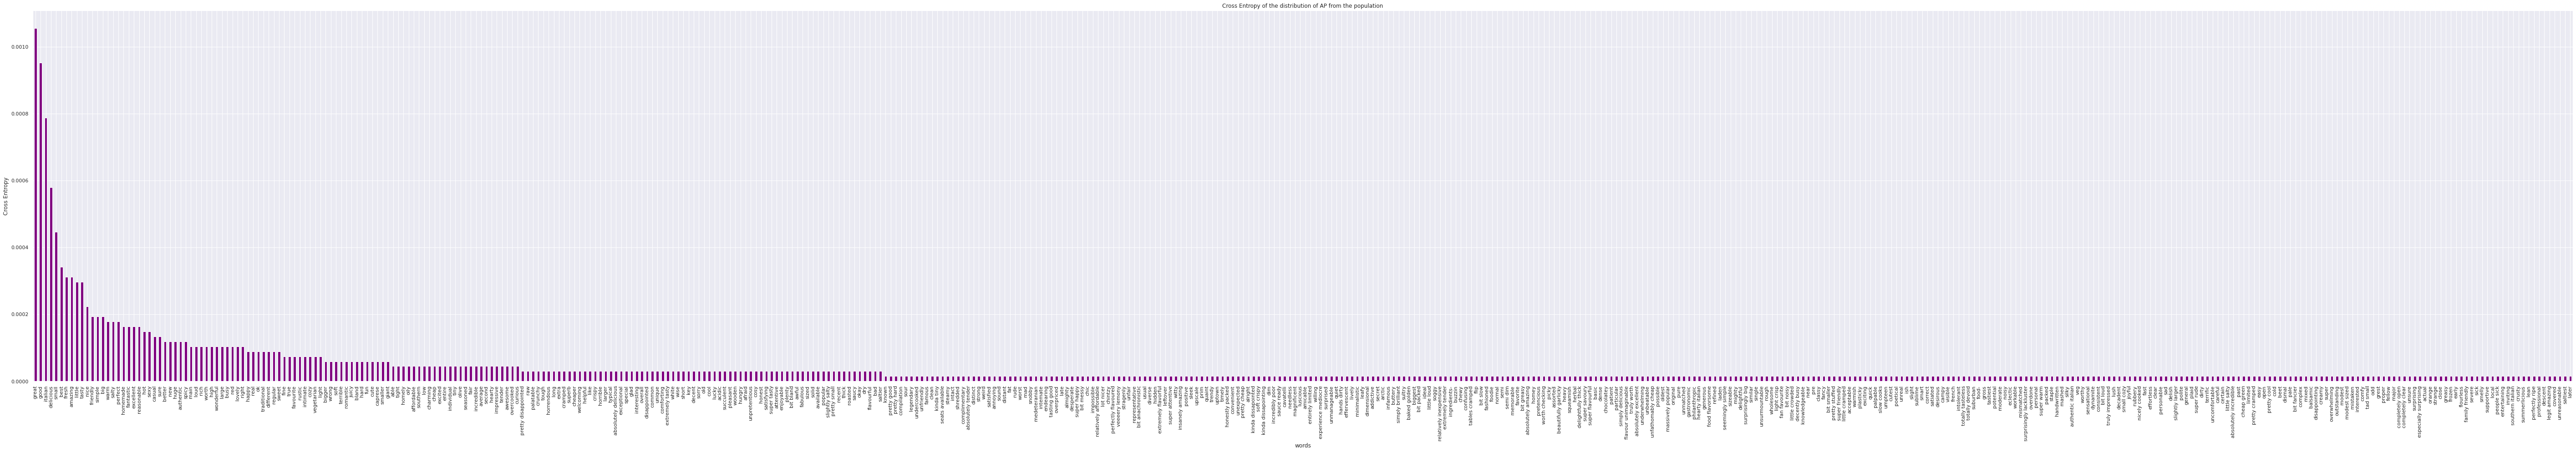

In [ ]:
df_pop.plot.bar(legend = False, color = 'purple',figsize = (100,15))
plt.xticks(np.arange(len(prob_pop_words)),prob_pop_words)
plt.title('Cross Entropy of the distribution of AP from the population')
plt.xlabel('words')
plt.ylabel('Cross Entropy')
plt.show()

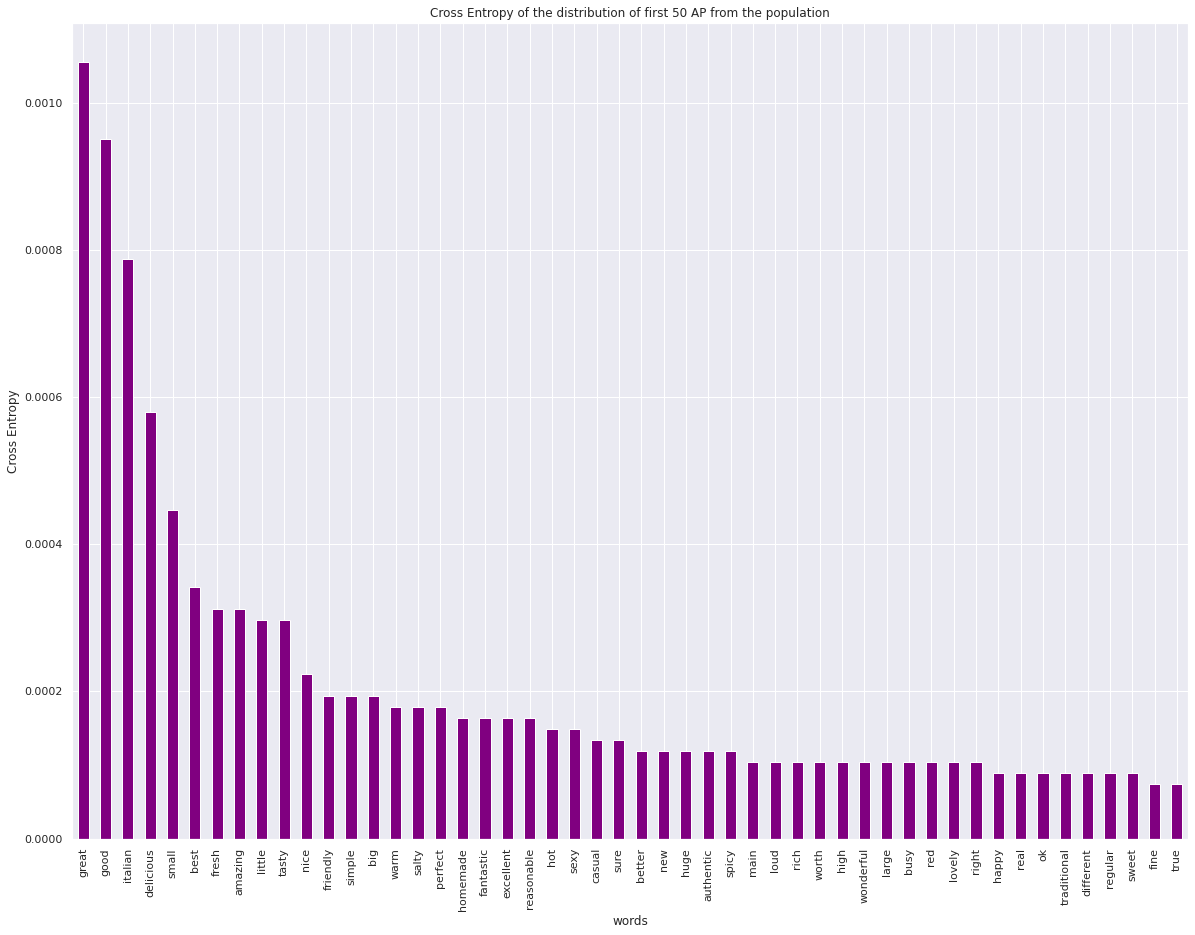

In [ ]:
# Zoomed in diagram for Report and Clarity
df_pop_50=pd.DataFrame(prob_pop[:50])
df_pop_50.plot.bar(legend = False, color = 'purple',figsize = (20,15))
plt.xticks(np.arange(50),prob_pop_words[:50])
plt.title('Cross Entropy of the distribution of first 50 AP from the population')
plt.xlabel('words')
plt.ylabel('Cross Entropy')
plt.show()

### Confidence method to determine uniqueness of APs to b3
The higher the confidence, the more unique the APs are, hence indicative of b3

In [ ]:
count_AP_b3 = Counter(AP_b3)
count_AP_sample = Counter(AP_sample) + count_AP_b3

In [ ]:
confidences = {}
for ap_ in count_AP_b3:
    confidences[ap_] = (count_AP_b3[ap_] * 1.0 )/count_AP_sample[ap_]

We extract only the APs with confidence of 1.0 and these are the indicative adjective phrases of the randomly selected business b3.

In [ ]:
IAP_list=[]
for w in sorted(confidences, key=confidences.get, reverse=True):
    if confidences[w]==1.0:
        IAP_list.append(w)
IAP=pd.DataFrame(IAP_list)
IAP.head()

,0
0,known
1,compilation
2,kinda tiny
3,seats available
4,steamy


## Application
---

We will be using the sentiment, length and content of the review to predict the possible rating that it might receive.

In [ ]:
application = selected_100[['stars', 'sentiment', 'lengths']]
application.head()

,stars,sentiment,lengths
0,5,0.730208,35
1,4,0.133333,106
2,5,0.342560,216
3,3,0.157388,147
4,1,-0.035185,290


In [ ]:
def get_adj_score(review, top_adjectives = top_adjectives_by_rating[0]):
    count = 0
    words = {}
    for doc in review:
        for token in doc:
            words[token.text] = token.pos_
        for token in doc:
            if token.pos_ == "ADJ" and words[token.head.text] == "NOUN": #found a noun-adjective pair
                adj = token.text.lower()
                if adj in top_adjectives:
                    count += top_adjectives[adj]
    return count

In [ ]:
for i in range(0,5):
    application['adj_' + str(i + 1)] = selected_100[['nlp']].apply(get_adj_score, axis = 1, top_adjectives=top_adjectives_by_rating[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
application.head()

,stars,sentiment,lengths,adj_1,adj_2,adj_3,adj_4,adj_5
0,5,0.730208,35,1,1,2,4,6
1,4,0.133333,106,2,1,1,5,1
2,5,0.342560,216,5,6,4,3,4
3,3,0.157388,147,1,0,1,0,1
4,1,-0.035185,290,4,3,2,4,0


In [ ]:
Counter(application[['stars']].stars)

Counter({1: 2306, 2: 1372, 3: 1904, 4: 3559, 5: 6159})

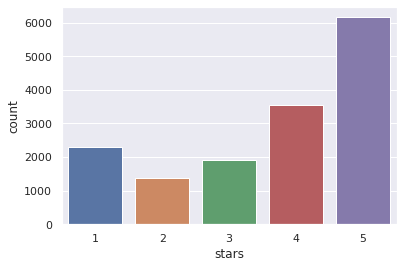

In [ ]:
sb.countplot(x="stars", data=application)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from joblib import dump, load

In [ ]:
X = application[['sentiment', 'lengths', 'adj_1', 'adj_2', 'adj_3', 'adj_4', 'adj_5']]
y = application[['stars']]

X_ori_train, X_ori_test, y_ori_train, y_ori_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Using only sentiment and review length to predict

In [ ]:
cols = ['sentiment', 'lengths']
X_train, X_test, y_train, y_test = X_ori_train[cols], X_ori_test[cols], y_ori_train, y_ori_test
clf = RandomForestClassifier().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


train accuracy: 0.9879551820728292
test accuracy: 0.4261437908496732


Text(0.5, 1.0, 'test')

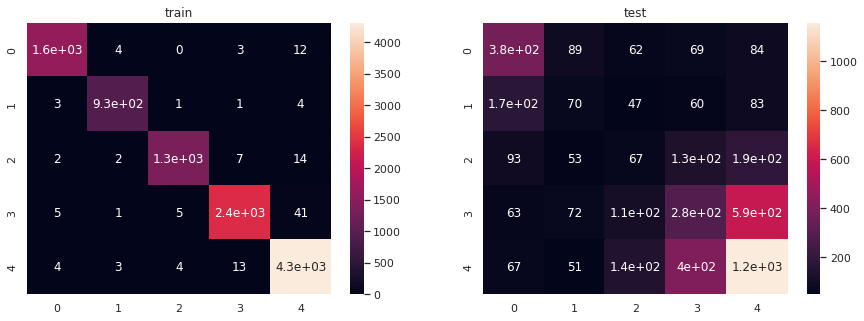

In [ ]:
print("train accuracy:", clf.score(X_train, y_train))
print("test accuracy:", clf.score(X_test, y_test))

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, ax = ax1)
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, ax = ax2)
ax1.set_title('train')
ax2.set_title('test')

### Adding the use of noun-adjective pairs

We saved the adjective portions of the top 10 noun-adjective pairs for each star rating in the earlier section. Now, for each review, we extract the noun adjective pairs and check if the adjective part matches with our saved adjectives. We count the number of such adjectives and use it as additional features.

For example, the *adj_1* column stores the number of noun-adjective pairs found, where its adjective was found to be in the top 10 noun-adjective pairs for star rating 1.

In [ ]:
cols = ['sentiment', 'lengths', 'adj_1', 'adj_2', 'adj_3', 'adj_4', 'adj_5']
X_train, X_test, y_train, y_test = X_ori_train[cols], X_ori_test[cols], y_ori_train, y_ori_test
clf = RandomForestClassifier().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


train accuracy: 0.9972922502334267
test accuracy: 0.4747276688453159


Text(0.5, 1.0, 'test')

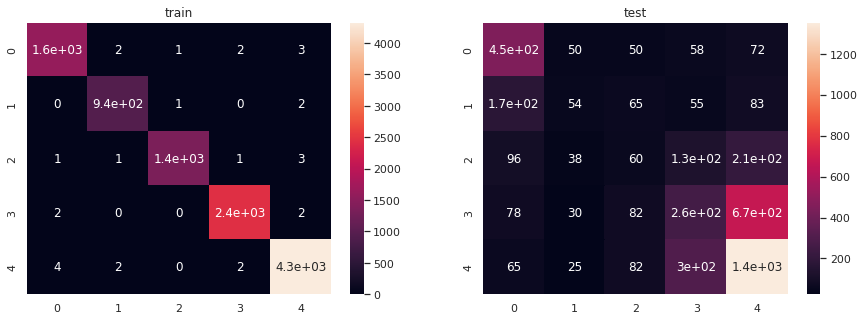

In [ ]:
print("train accuracy:", clf.score(X_train, y_train))
print("test accuracy:", clf.score(X_test, y_test))

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, ax = ax1)
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, ax = ax2)
ax1.set_title('train')
ax2.set_title('test')

In [ ]:
dump(clf, 'tags_predictor.joblib') #save our final classifier

['tags_predictor.joblib']

### Predict good, neutral and bad ratings instead of individual star ratings

In [ ]:
def convert_stars (star):
    star = star.item()
    if star == 5 or star == 4:
        return 1
    elif star == 3:
        return 0
    else:
        return -1

In [ ]:
cols = ['sentiment', 'lengths', 'adj_1', 'adj_2', 'adj_3', 'adj_4', 'adj_5']
X_train, X_test, y_train, y_test = X_ori_train[cols], X_ori_test[cols], pd.DataFrame(y_ori_train.apply(convert_stars, axis = 1)), pd.DataFrame(y_ori_test.apply(convert_stars, axis = 1))
clf = RandomForestClassifier().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


train accuracy: 0.9977591036414566
test accuracy: 0.7562091503267974


Text(0.5, 1.0, 'test')

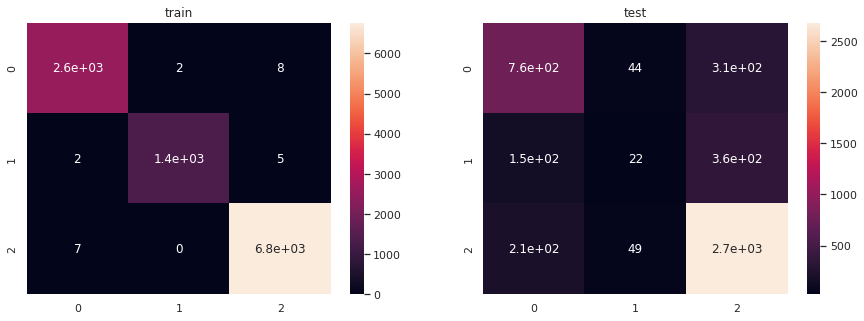

In [ ]:
print("train accuracy:", clf.score(X_train, y_train))
print("test accuracy:", clf.score(X_test, y_test))

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, ax = ax1)
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, ax = ax2)
ax1.set_title('train')
ax2.set_title('test')

### Stratified sampling

We sampled 1300 data points from each star rating to combat the uneven class distribution.

In [ ]:
sample_application = application.loc[application['stars'] == 1].sample(1300)
for i in range(2,6):
    sample_application = sample_application.append(application.loc[application['stars'] == i].sample(1300))
sample_application.head()

,stars,sentiment,lengths,adj_1,adj_2,adj_3,adj_4,adj_5
13739,1,0.147461,273,1,0,3,1,3
1429,1,0.018330,248,2,4,4,4,5
1366,1,-0.260490,66,0,0,0,2,0
1648,1,0.196621,437,15,15,14,25,19
7449,1,-0.049032,61,1,0,1,0,1


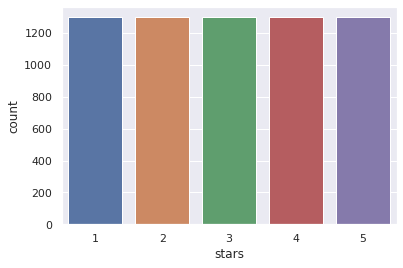

In [ ]:
sb.countplot(x="stars", data=sample_application)

In [ ]:
X = sample_application[['sentiment', 'lengths', 'adj_1', 'adj_2', 'adj_3', 'adj_4', 'adj_5']]
y = sample_application[['stars']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


train accuracy: 0.9984615384615385
test accuracy: 0.3717948717948718


Text(0.5, 1.0, 'test')

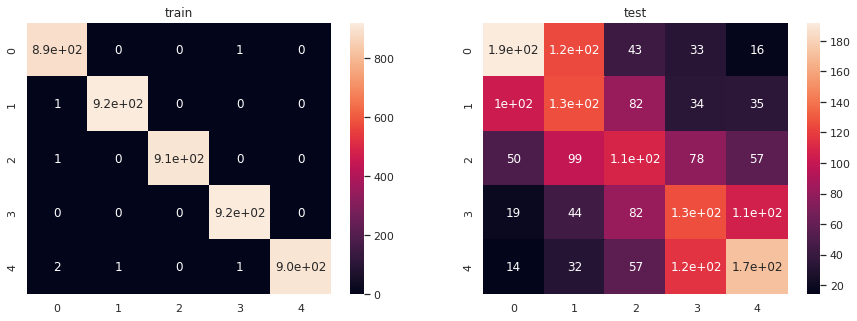

In [ ]:
print("train accuracy:", clf.score(X_train, y_train))
print("test accuracy:", clf.score(X_test, y_test))

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, ax = ax1)
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, ax = ax2)
ax1.set_title('train')
ax2.set_title('test')

### Using the application

In [ ]:
model=load("/content/tags_predictor.joblib")

In [ ]:
def process_user_review(text):
    tensor = []
    doc = nlp(text)
    blob = TextBlob(text)
    tensor.append(blob.sentiment.polarity)
    tensor.append(len(doc))
    for i in range(0,5):
        tensor.append(get_adj_score([doc], top_adjectives_by_rating[i]))
    return [tensor]

In [ ]:
user_review = input('Enter Review: ')

print('Stars:', int(model.predict(process_user_review(user_review))))

Enter Review: food was ok, service and ambience within expectations
Stars: 5
